In [130]:
!pip install hvPlot

In [131]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas


In [155]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

In [14]:
# Create a DataFrame with the scaled data
market_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Display sample data
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_scaled_df)
    inertia_values.append(k_model.inertia_)
    

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


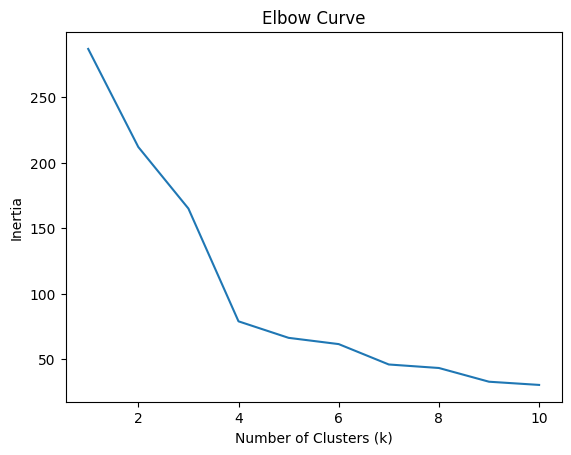

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
k_values = elbow_df['k']
inertia_values = elbow_df['inertia']
plt.plot(k_values, inertia_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for K is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [73]:
# Initialize the K-Means model using the best value for k
k = 4
model = KMeans(n_clusters=k)

In [74]:
# Fit the K-Means model using the scaled data
model.fit(market_scaled_df)

KMeans(n_clusters=4)

In [75]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = model.predict(market_scaled_df)

# View the resulting array of cluster values.
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 3 1 0 0 2
 0 1 1 0]


In [76]:
# Create a copy of the DataFrame
market_df_copy = market_data_df.copy()

In [77]:
# Add a new column to the DataFrame with the predicted clusters
market_scaled_df['Cluster'] = cluster_values

# Display sample data
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


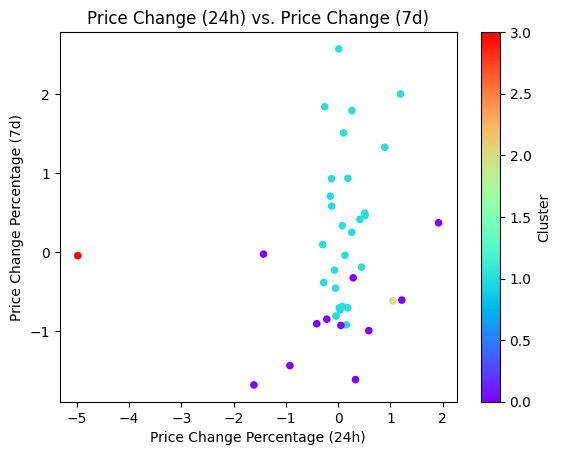

In [80]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_scaled_df.plot(x="price_change_percentage_24h", y="price_change_percentage_7d", 
                      kind="scatter", c="Cluster", colormap="rainbow")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Price Change (24h) vs. Price Change (7d)")
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [85]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [87]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_scaled_df)


# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.37244573,  0.95767914,  0.51635832],
       [-0.27843333,  0.56207418,  0.98026143],
       [-0.42874276, -0.08308903, -0.49010398],
       [-0.4633954 , -0.1254302 , -0.31677683],
       [-0.64456471,  2.25910738,  1.83587464]])

In [88]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36826487, 0.33226139, 0.18082624])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components are 0.36826487, 0.33226139, 0.18082624

In [91]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Set the coinid column as index
pca_df['coin_id'] = crypto_names
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.372446,0.957679,0.516358
ethereum,-0.278433,0.562074,0.980261
tether,-0.428743,-0.083089,-0.490104
ripple,-0.463395,-0.125430,-0.316777
bitcoin-cash,-0.644565,2.259107,1.835875
binancecoin,-0.195073,1.480234,0.774157
chainlink,-0.174003,0.650393,2.767089
cardano,-0.101509,0.815994,1.450547
litecoin,-0.476450,0.567480,0.687613


### Find the Best Value for k Using the PCA Data

In [104]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i)
    k_model.fit(pca_df)
    inertia_values.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,265.674039
1,2,172.697662
2,3,118.332454
3,4,50.884579
4,5,38.881289
5,6,27.565759
6,7,21.041944
7,8,16.660624
8,9,15.683094
9,10,11.380169


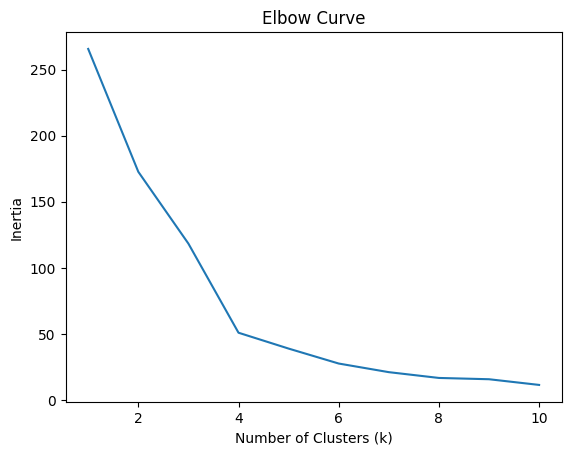

In [105]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
k_values = elbow_df['k']
inertia_values = elbow_df['inertia']
plt.plot(k_values, inertia_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the best k value found using the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [106]:
# Initialize the K-Means model using the best value for k
k = 4
model = KMeans(n_clusters=k)

In [107]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

KMeans(n_clusters=4)

In [111]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = model.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_values)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [156]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_values

# Display sample data
pca_df_copy

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.372446,0.957679,0.516358,3
ethereum,-0.278433,0.562074,0.980261,3
tether,-0.428743,-0.083089,-0.490104,0
ripple,-0.463395,-0.125430,-0.316777,0
bitcoin-cash,-0.644565,2.259107,1.835875,3
binancecoin,-0.195073,1.480234,0.774157,3
chainlink,-0.174003,0.650393,2.767089,3
cardano,-0.101509,0.815994,1.450547,3
litecoin,-0.476450,0.567480,0.687613,3


In [154]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df_copy.hvplot.scatter(x="PCA1", y="PCA2", c="Cluster", title="PCA1 vs PCA2 Scatter Plot")



:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [153]:
# Use the columns from the original scaled DataFrame as the index.
market_scaled_df.set_index(market_scaled_df.columns, inplace=True)


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Ethlend, celsius-degree-token and chainlink has the strongest positive influence on each component
    